In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024")

print("Path to dataset files:", path)

100%|██████████| 41.0k/41.0k [00:00<00:00, 25.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = path + "/Mental_Health_Lifestyle_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [3]:
df.shape

(3000, 12)

In [4]:
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


In [5]:
# Convert 'Happiness Score' to numeric before comparison
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')

# Apply the categorization with 0 and 1
df['Happiness Score'] = np.where(df['Happiness Score'] < 5, 0, 1)

In [6]:
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,1
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,1
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,1
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,1
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,1
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,1
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,0
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,0


In [7]:
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Exercise Level,0
Diet Type,0
Sleep Hours,0
Stress Level,0
Mental Health Condition,595
Work Hours per Week,0
Screen Time per Day (Hours),0


In [8]:
def outliners(data):

  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)].tolist()
  return outliers


for column in df.select_dtypes(include=['number']).columns:
  outliers = outliners(df[column])
  if outliers:
    print(f"Outliers for {column}: {outliers}")

Outliers for Sleep Hours: [1.4, 11.3, 2.1, 10.6, 1.7, 10.6, 2.3, 10.7, 11.1, 10.8, 11.2, 11.1, 10.7, 1.5, 10.6, 2.4]


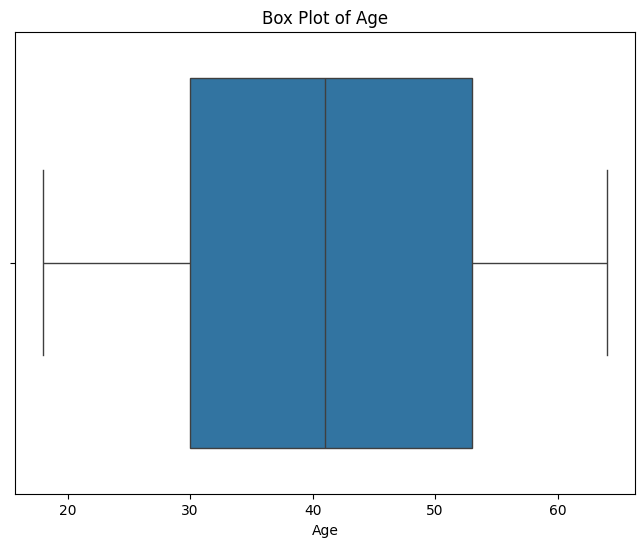

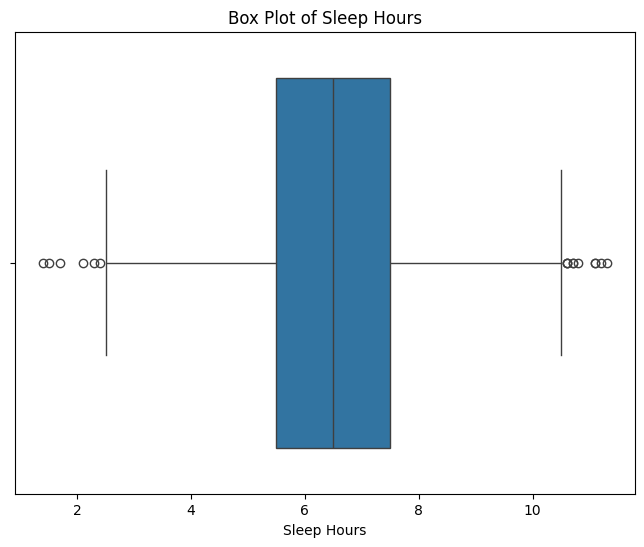

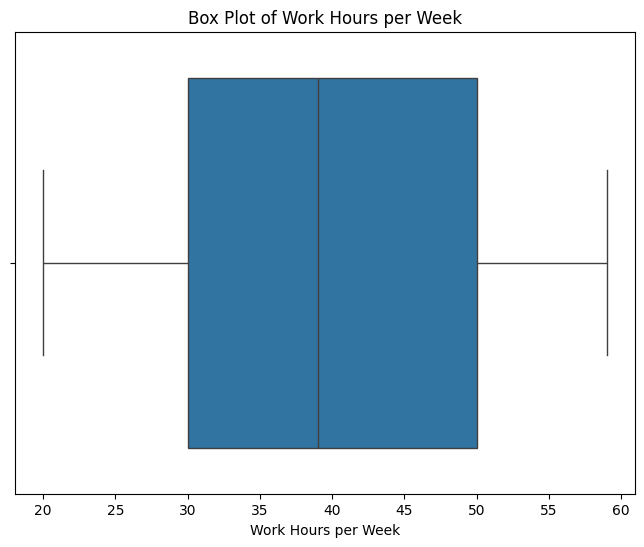

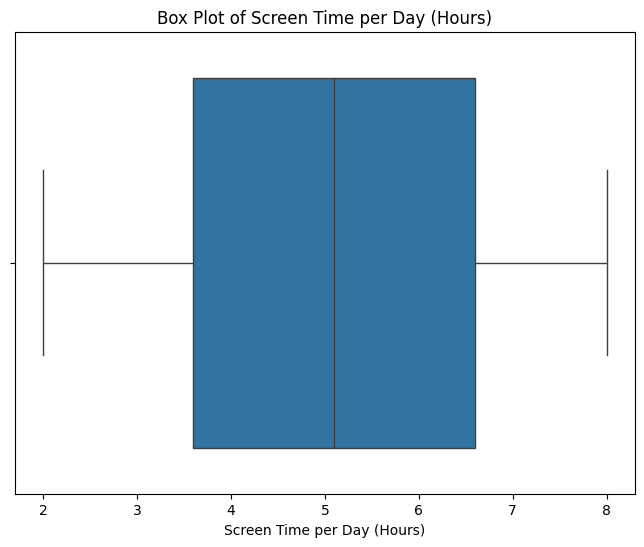

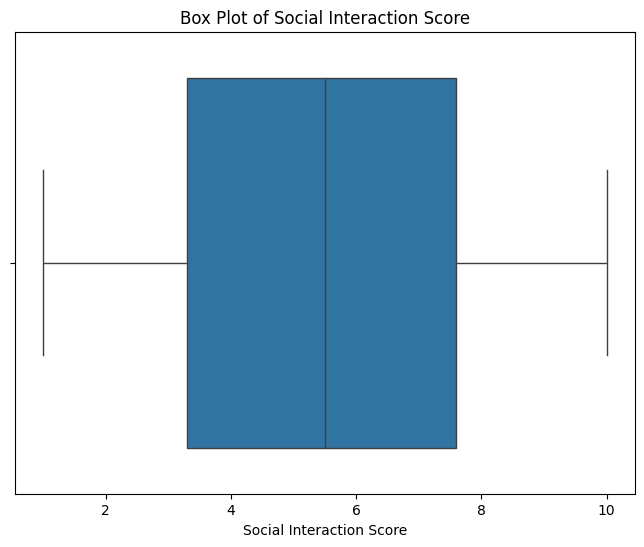

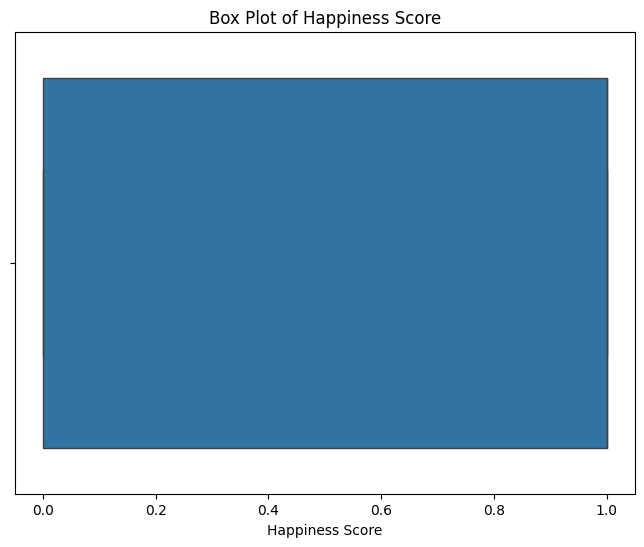

In [9]:
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Box Plot of {column}")
  plt.show()


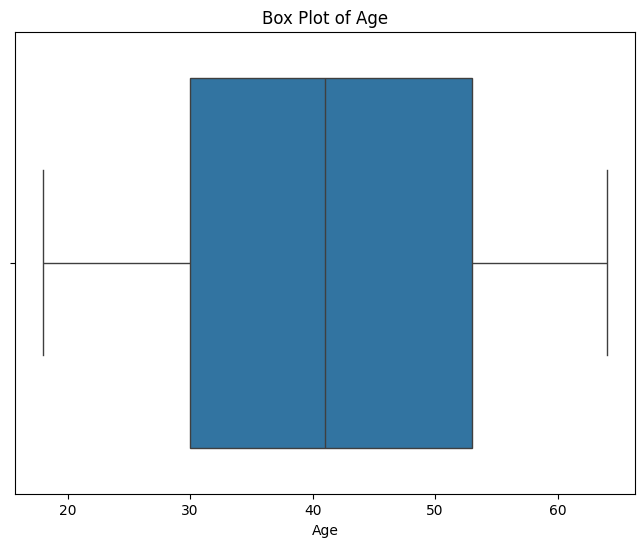

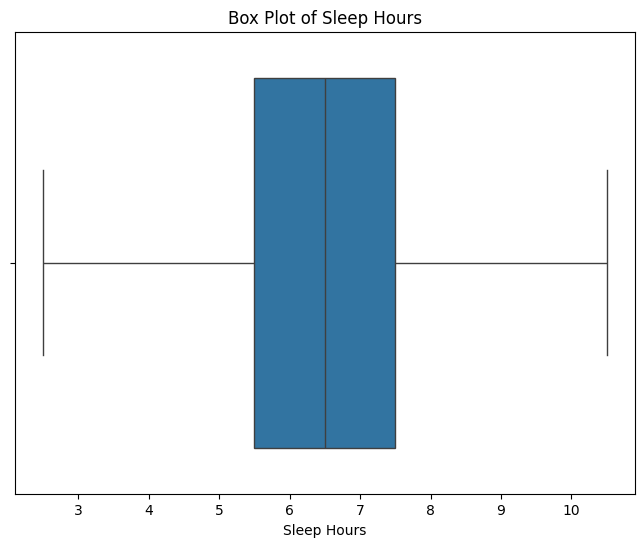

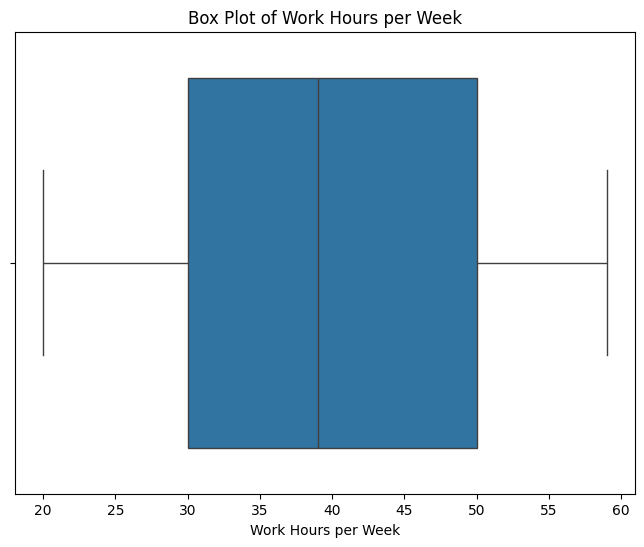

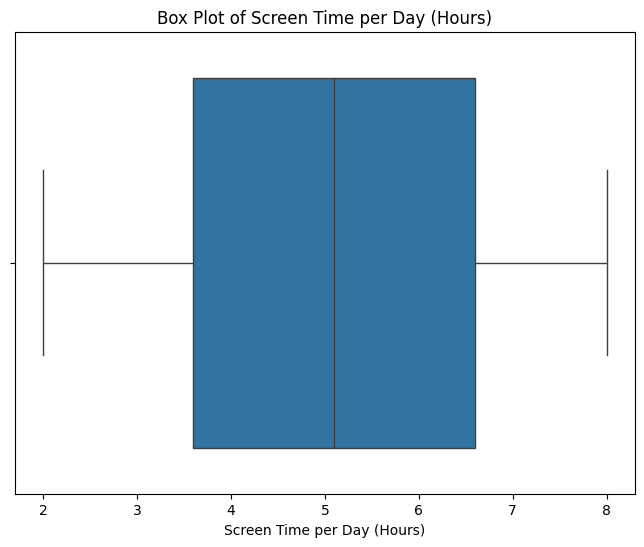

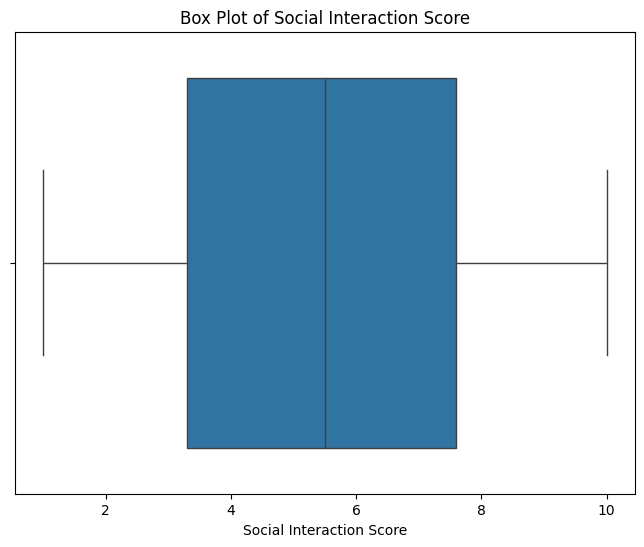

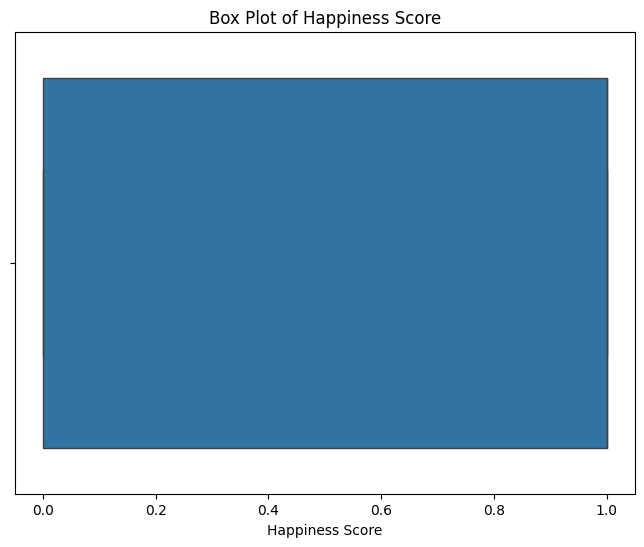

In [10]:
def replace_outliers_with_mode(data):
  """Replaces outliers in a Series with the mode."""
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  data_copy = data.copy()
  data_copy[(data_copy < lower_bound) | (data_copy > upper_bound)] = data.mode()[0]  # Replace with mode
  return data_copy


# Apply the function to 'Sleep Hours'
df['Sleep Hours'] = replace_outliers_with_mode(df['Sleep Hours'])

# Verify that outliers are replaced
for column in df.select_dtypes(include=['number']).columns:
  outliers = outliners(df[column])
  if outliers:
    print(f"Outliers for {column}: {outliers}")

# Re-plot box plots after replacing outliers
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Box Plot of {column}")
  plt.show()


In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = df.select_dtypes(include=['object']).columns

p_values = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Happiness Score'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values[feature] = p

significance_level = 0.05
features_to_remove = [feature for feature, p_value in p_values.items() if p_value > significance_level]

df = df.drop(columns=features_to_remove)


print("Features a remover:", features_to_remove)

Features a remover: ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']


In [12]:
df.shape

(3000, 6)

In [13]:
df

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,48,6.3,21,4.0,7.8,1
1,31,4.9,48,5.2,8.2,1
2,37,7.2,43,4.7,9.6,1
3,35,7.2,43,2.2,8.2,1
4,46,7.3,35,3.6,4.7,0
...,...,...,...,...,...,...
2995,57,7.0,29,4.4,9.7,1
2996,27,7.1,47,7.4,6.3,1
2997,42,6.0,23,3.9,5.2,0
2998,25,5.7,51,4.3,5.9,0


In [14]:
# In [14]: prompt: noramaliza con scaler

from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling, excluding the target variable
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop('Happiness Score')  # Exclude 'Happiness Score'

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled DataFrame
df

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,0.504264,-0.116903,-1.612844,-0.623853,0.908976,1
1,-0.761919,-1.073445,0.745328,0.063063,1.065037,1
2,-0.315031,0.498017,0.308629,-0.223152,1.611249,1
3,-0.463994,0.498017,0.308629,-1.654226,1.065037,1
4,0.355301,0.566341,-0.390088,-0.852824,-0.300495,0
...,...,...,...,...,...,...
2995,1.174596,0.361368,-0.914126,-0.394881,1.650264,1
2996,-1.059845,0.429692,0.657988,1.322407,0.323748,1
2997,0.057375,-0.321876,-1.438164,-0.681096,-0.105419,0
2998,-1.208808,-0.526850,1.007347,-0.452124,0.167687,0


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (2400, 5)
Dimensiones de X_test: (600, 5)
Dimensiones de y_train: (2400,)
Dimensiones de y_test: (600,)


In [16]:
y_train.shape

(2400,)

In [45]:
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)  # Ya está binarizado antes

# Predicción y cálculo de accuracy
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Guardar correctamente el modelo y el scaler
joblib.dump(gnb, 'gaussian_nb_model.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

print(f"Precisión del modelo GaussianNB: {accuracy:.4f}")


Precisión del modelo GaussianNB: 0.5267


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Seleccionar 10 mejores características
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.5266666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=5. All the features will be returned.
  warnings.warn(


In [23]:
# Modelo entrenado con KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # Puedes ajustar el número de vecinos
knn.fit(X_train, y_train_cat)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test_cat, y_pred_knn)

print(f"Precisión del modelo KNN: {accuracy_knn:.4f}")


Precisión del modelo KNN: 0.4717


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=80, random_state=42)  # Ajusta n_estimators según sea necesario
rf_classifier.fit(X_train, y_train_cat)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test_cat, y_pred_rf)

print(f"Precisión del modelo Random Forest: {accuracy_rf:.4f}")


Precisión del modelo Random Forest: 0.5483


In [39]:
print(scaler.feature_names_in_)


['Age' 'Sleep Hours' 'Work Hours per Week' 'Screen Time per Day (Hours)'
 'Social Interaction Score']


In [41]:
# prompt: por joblib exporta el modelo de gaussiannb y el scaler

joblib.dump(model, 'gaussian_nb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>
